This Notebook graphically depicts how a soundwave is sequentialy converted to MFCCs using fourier transformation which is then converted to a Mel Spectrogram and eventually MFCCs. 

In [43]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [44]:
def waveform_plot(y, genre,output_dir, sr=22050):
    plt.figure(figsize=(16, 5))
    librosa.display.waveshow(y, sr=sr,color = "#6600CC")
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel('Amplitude')
    plt.tight_layout()
    output_path = os.path.join(output_dir, "waveform.png")
    plt.savefig(output_path)
    plt.show()
    plt.close()  
    print(f"Saved {genre} waveform to {output_path}")

In [45]:
def stft_plot(S_db, sr, output_dir):
    plt.figure(figsize=(16, 5))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    output_path = os.path.join(output_dir, "stft_spectrogram.png")
    plt.savefig(output_path)
    plt.show()
    plt.close()
    print(f"Saved STFT spectrogram to {output_path}")

In [46]:
def mel_spectrogram_plot(mel_spectrogram_db, sr, output_dir):
    plt.figure(figsize=(16, 5))
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    output_path = os.path.join(output_dir, "mel_spectrogram.png")
    plt.savefig(output_path)
    plt.show()
    plt.close()
    print(f"Saved Mel spectrogram to {output_path}")

In [47]:
def mfcc_plot(mfccs, sr, n_mfcc, output_dir):
    plt.figure(figsize=(16, 5))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='plasma')
    plt.colorbar()
    plt.title(f'MFCCs (First {n_mfcc} Coefficients)')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    output_path = os.path.join(output_dir, "mfcc.png")
    plt.savefig(output_path)
    plt.show()
    plt.close()
    print(f"Saved MFCCs to {output_path}")

In [48]:
def audio_process(file_path, output_dir, sr=22050, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=sr)
    
    # Compute the STFT
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    
    # Compute the Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
    
    # Compute the MFCC
    mfccs = librosa.feature.mfcc(S=mel_spectrogram_db, sr=sr, n_mfcc=n_mfcc)

    # Make a directory if the output directory doesn't exist 
    os.makedirs(output_dir, exist_ok=True)

    # plot each one of these 
    waveform_plot(y, sr, output_dir)
    stft_plot(S_db, sr, output_dir)
    mel_spectrogram_plot(mel_spectrogram_db, sr, output_dir)
    mfcc_plot(mfccs, sr, n_mfcc, output_dir)


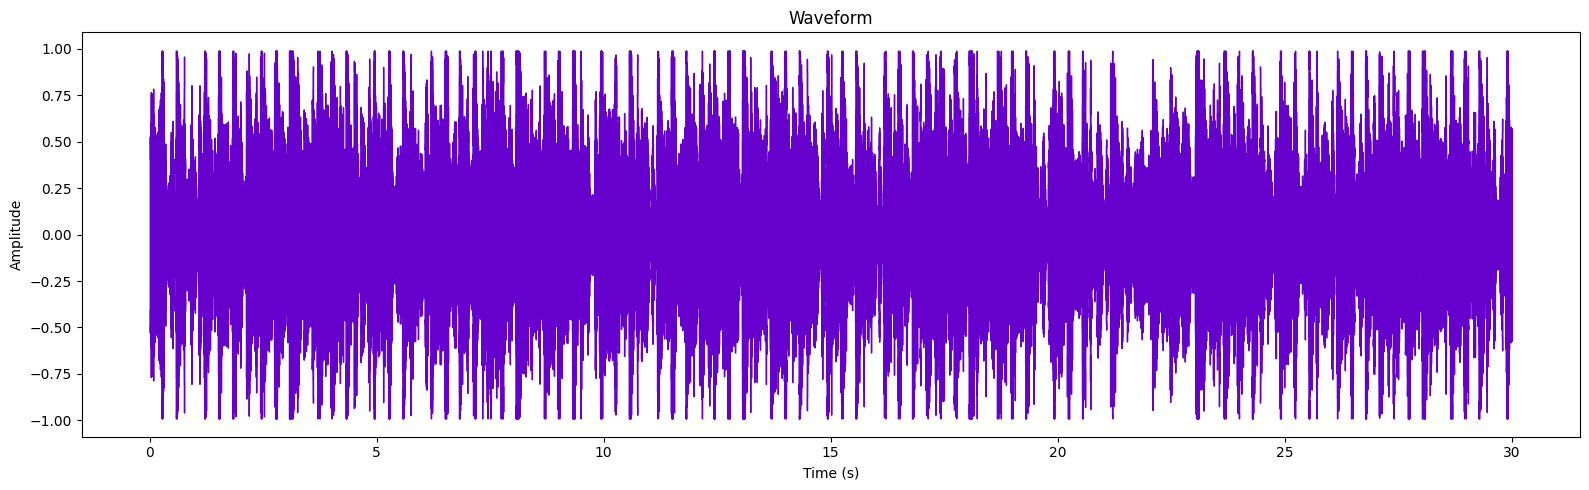

Saved 22050 waveform to mfcc_transformation/waveform.png


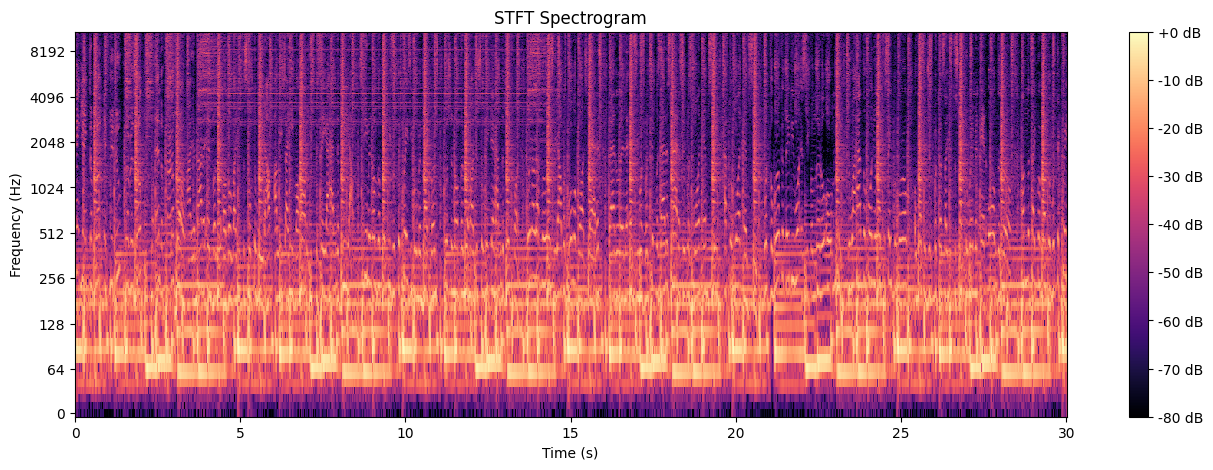

Saved STFT spectrogram to mfcc_transformation/stft_spectrogram.png


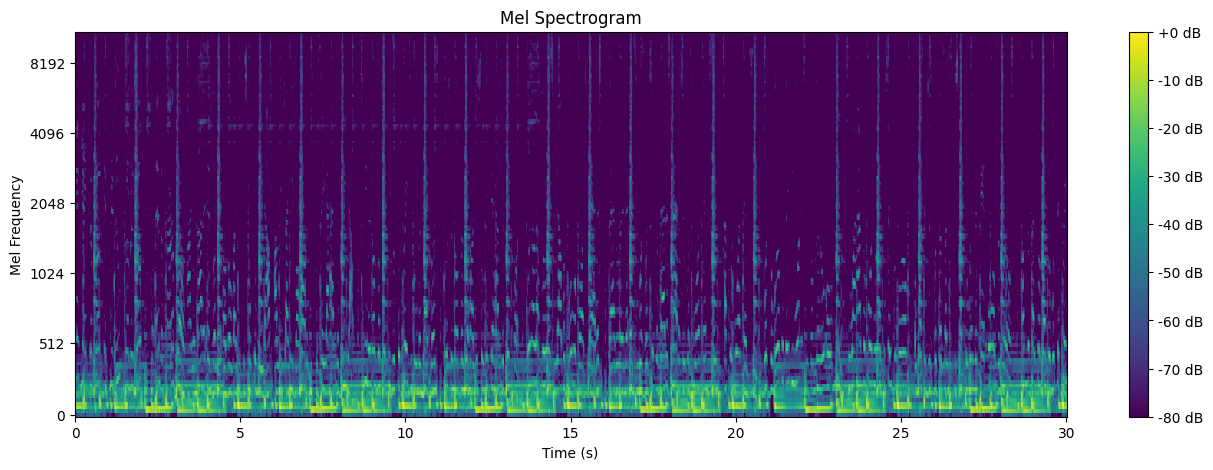

Saved Mel spectrogram to mfcc_transformation/mel_spectrogram.png


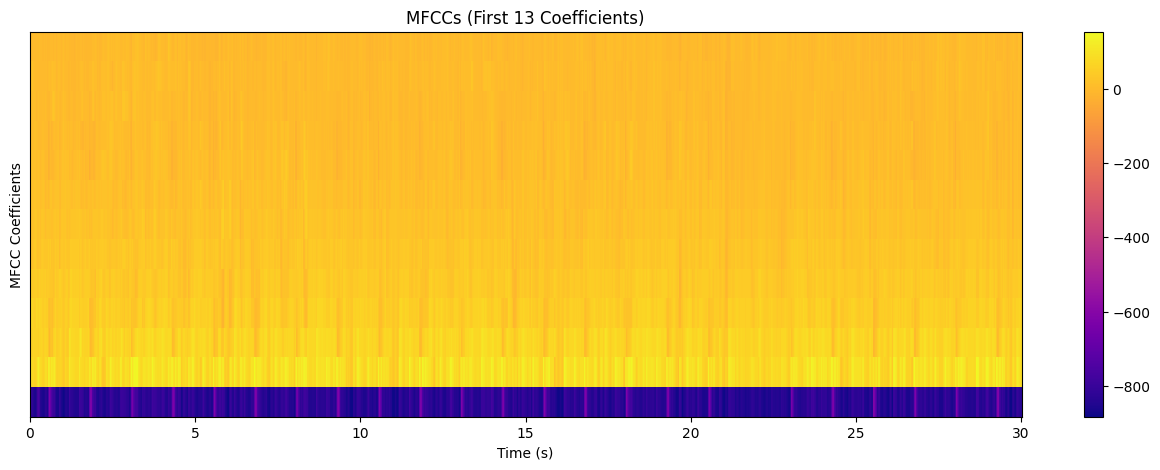

Saved MFCCs to mfcc_transformation/mfcc.png


In [49]:
output_dir = "mfcc_transformation"
audio_process('/Users/aravpatel/iml final/genres/hiphop/hiphop.00070.wav', output_dir)